# This work is dedicated to primary data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read data

In [2]:
df = pd.read_excel('data/Lake.xls', index_col='Дата')
df.head()

,Станция,"Глубина станции, м","Прозр,м","Горизонт, м","Температура, оС","Раств кислород, мг/л",% насыщения
Дата,,,,,,,
1955-08-02,Станция-2,5.0,NaN,0.05,23.65,10.06,119.9
1955-08-02,Станция-2,5.0,NaN,3.00,19.00,5.27,57.2
1955-08-02,Станция-2,5.0,NaN,4.50,NaN,5.13,NaN
1955-08-18,Станция-2,5.5,NaN,0.05,22.30,9.96,115.5
1955-08-18,Станция-2,5.5,NaN,2.00,22.00,9.99,115.2


In [3]:
df.columns

Index(['Станция', 'Глубина станции, м', 'Прозр,м', 'Горизонт, м',
       'Температура, оС', 'Раств кислород, мг/л', '% насыщения'],
      dtype='object')

Будем исследовать растворимость кислорода на горизонте 3м за август месяц. Если за месяц имеется несколько наблюдений, возьмем среднее значение.

In [4]:
# Горизонт 3м и август месяц наблюдений растворимости кислорода
df = df[ (df['Горизонт, м'] == 3) & (df.index.month == 8) ]['Раств кислород, мг/л']

In [5]:
df.resample(rule='AS-AUG').mean()

Дата
1955-08-01    5.270000
1956-08-01         NaN
1957-08-01         NaN
1958-08-01         NaN
1959-08-01         NaN
1960-08-01         NaN
1961-08-01         NaN
1962-08-01         NaN
1963-08-01         NaN
1964-08-01         NaN
1965-08-01         NaN
1966-08-01    8.373333
1967-08-01    8.720000
1968-08-01    8.856667
1969-08-01    8.925000
1970-08-01         NaN
1971-08-01    9.620000
1972-08-01    8.570000
1973-08-01    8.983333
1974-08-01    9.090000
1975-08-01    9.600000
1976-08-01    9.570000
1977-08-01         NaN
1978-08-01    9.730000
1979-08-01    7.480000
1980-08-01    8.030000
1981-08-01    8.650000
1982-08-01    8.910000
1983-08-01    7.440000
1984-08-01    9.570000
1985-08-01    9.030000
1986-08-01    9.560000
1987-08-01    8.510000
1988-08-01    8.850000
1989-08-01    9.340000
1990-08-01         NaN
1991-08-01    9.600000
1992-08-01    9.000000
1993-08-01    8.090000
1994-08-01    7.940000
1995-08-01    8.510000
1996-08-01    9.280000
1997-08-01    8.190000
1998-0

Будем исследовать наблюдения начиная с 1966 года. Пропущенные значения заполним средним арифметическим предыдущим и следующим значениями.

In [6]:
df = df.resample(rule='AS-AUG').mean()['1966-08-01':]

In [7]:
df.index.rename('Data', inplace=True);
df.rename('Oxygen', inplace=True);

In [8]:
for i in range(len(df)):
    if np.isnan(df.iloc[i]):
        df.iloc[i] = (df.iloc[i-1] + df.iloc[i+1]) / 2

In [9]:
df.head()

Data
1966-08-01    8.373333
1967-08-01    8.720000
1968-08-01    8.856667
1969-08-01    8.925000
1970-08-01    9.272500
Freq: AS-AUG, Name: Oxygen, dtype: float64

### График временного ряда

In [10]:
def plot_attributes(ax, xlabel='', ylable='', title=''):
    ax.set_xlabel(xlabel, size = 15, weight='bold')
    ax.set_ylabel(ylable, size = 15, weight='bold')
    ax.set_title(title, size = 10, weight='bold')
    return ax

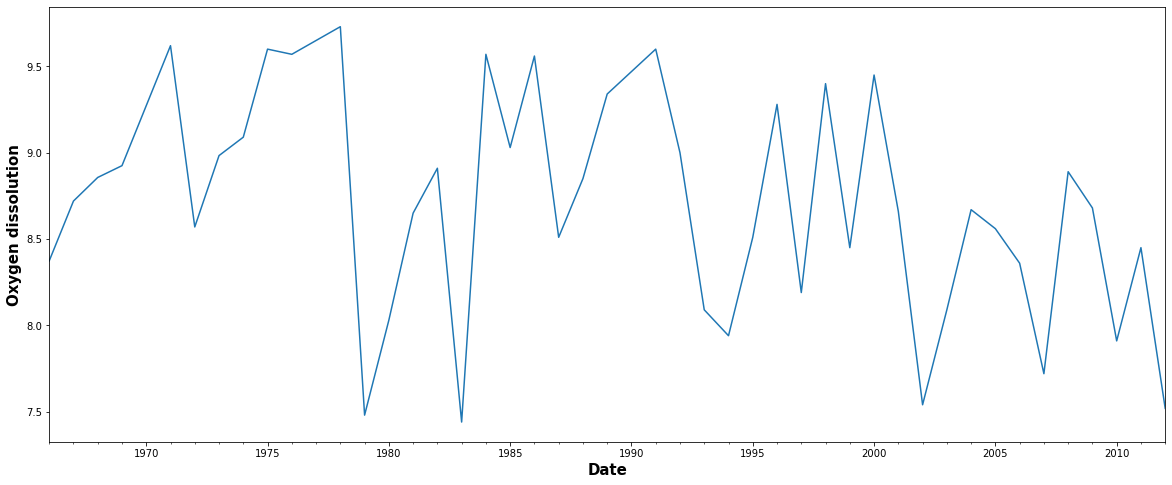

In [11]:
ax = df.plot(figsize=(20, 8));
plot_attributes(ax, 'Date', 'Oxygen dissolution');

# Анализ графика
На грифике не видны какие либо аномальные значения. При первом взгляде, можно увидеть что наблюдения убывают со временем. Так как мы исследуем средние значения за август месяц, то будем считать, что сезонность отсуствует.

In [12]:
from scipy import stats 
def characteristics(series):
    table = {}
    table['Среденее'] = round(np.mean(series), 2)
    table['Медиана'] = round(np.median(series), 2)
    table['Нижний квантиль'] = round(np.quantile(series, 0.25), 2)
    table['Верхний квантиль'] = round(np.quantile(series, 0.75), 2)
    table['Минимум'] = round(np.min(series), 2)
    table['Максимум'] = round(np.max(series), 2)
    table['Размах'] = round(np.max(series) - np.min(series), 2)
    table['Квартильный размах'] = round(np.quantile(series, 0.75) - np.quantile(series, 0.25), 2)
    table['Дисперсия'] = round(np.var(series), 2)
    table['Стандартное отклонение'] = round(np.std(series), 2)
    table['Коэффициент вариации, %'] = round(100 * np.var(series) / np.mean(series), 2)
    table['Стандартная ошибка'] = round(np.std(series) / np.sqrt(len(series)), 2)
    table['Ассиметрия'] = round(stats.skew(series), 2)
    table['Ошибка ассиметрии'] = round(np.sqrt((6*(len(series) - 1))/((len(series) + 1)*(len(series) + 3))), 2)
    table['Эксцесс'] = round(stats.kurtosis(series, fisher=True), 2)
    table['Ошибка эксцесса'] = round(np.sqrt((24*(len(series) - 2)*(len(series) - 3)*len(series) )/(((len(series) - 1)**2)*(len(series) + 3)*(len(series) + 5))), 2)
    return table
def describe(table):
    for item, value in table.items():
        print(f'{item}: {value}'.format(item=item,value=value))

### Описательные характеристики

In [13]:
dscrb = characteristics(df)
describe(dscrb)

Среденее: 8.74
Медиана: 8.72
Нижний квантиль: 8.37
Верхний квантиль: 9.31
Минимум: 7.44
Максимум: 9.73
Размах: 2.29
Квартильный размах: 0.94
Дисперсия: 0.42
Стандартное отклонение: 0.65
Коэффициент вариации, %: 4.83
Стандартная ошибка: 0.09
Ассиметрия: -0.32
Ошибка ассиметрии: 0.34
Эксцесс: -0.83
Ошибка эксцесса: 0.64


In [34]:
from scipy.stats import shapiro, kstest
from statsmodels.graphics.gofplots import qqplot

def shapiro_test(series):
    stat, p_val = shapiro(series)
    print(f'p_value: {p_val}, statistics: {stat}')
    if(p_val > 0.05):
        print(f'assume a normal distribution')
    else:
        print(f'not assume a normal distribution')
        
def ks_test(series):
    stat, p_val = kstest(series, 'norm')
    print(f'p_value: {p_val}, statistics: {stat}')
    if(p_val > 0.05):
        print(f'assume a normal distribution')
    else:
        print(f'not assume a normal distribution')

        
        
def check_normal(series, dscrb):
    #Shapiro-Wilk test
    print('Shapiro-Wilk test:')
    shapiro_test(series)
    print('----------------------------------------------------------------------------')
    
    #Kolmogorov Smirnov test:
    print('Kolmogorov Smirnov test:')
    ks_test(series)
    print('----------------------------------------------------------------------------')
    
    #Histogram. Number of Bins is calculated by Sturges rule: bins= 1 + log2[N], N - size of series
    bins = int(3 + np.log2(series.size))
    ax = series.plot.hist(bins=bins, edgecolor='k', figsize=(12,6), density=True)
    plt.plot(np.arange(dscrb['Минимум'], dscrb['Максимум'], 0.001), stats.norm.pdf(np.arange(dscrb['Минимум'], dscrb['Максимум'], 0.001),dscrb['Среденее'],dscrb['Дисперсия']), color='k')
    plot_attributes(ax, 'Oxygen dissolution', '', 'Histogram');
    
    #QQ plot
    fig, ax = plt.subplots(figsize=(6,6))
    stats.probplot(series, plot=ax)
    plot_attributes(ax, 'Normal theoretical quantiles', 'Oxygen dissolution quantiles', 'QQ-plot');
    

Проверим, подчиняются ли наши наблюдения нормальному распределению или нет.

Shapiro-Wilk test:
p_value: 0.04968912899494171, statistics: 0.9515230655670166
not assume a normal distribution
----------------------------------------------------------------------------
Kolmogorov Smirnov test:
p_value: 0.0, statistics: 0.9999999999999497
not assume a normal distribution
----------------------------------------------------------------------------


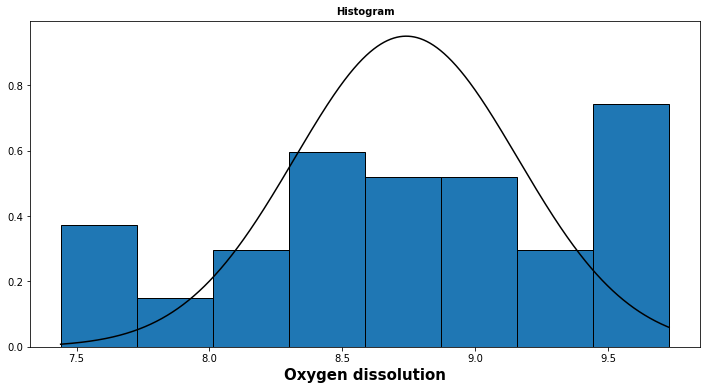

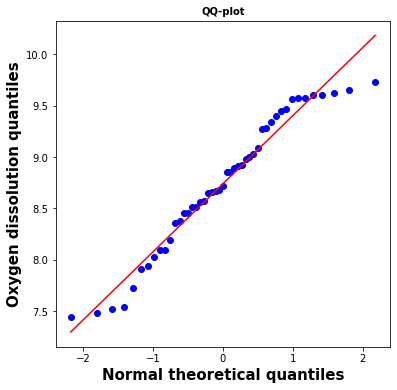

In [35]:
check_normal(df, dscrb)

В обоих тестах(Шапиро-Уилка и Колмогорова-Смирнова) p_value < 0.05, следовательно гипотеза о нормальном распределенни данных отвергается. На квантиль-квантиль графике точки лежат вдоль прямой, кроме как на концах. Будем считать, что наша выдорка не подчиняется закону нормального распределения.

Проверим на стационарность с помощью теста Дики-Фуллера

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [17]:
adf_test(df)

Augmented Dickey-Fuller Test: 
ADF test statistic      -5.013826
p-value                  0.000021
# lags used              0.000000
# observations          46.000000
critical value (1%)     -3.581258
critical value (5%)     -2.926785
critical value (10%)    -2.601541
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


p_value < 0.05, следовательно гипотеза о наличии единиченого корня отвергается и предполагаем, что наш ряд стационарный.

Построим агрфик автокорреляции с количеством лагов равным 15.

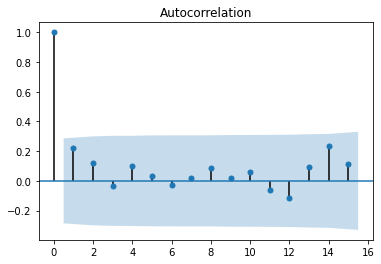

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=15);
#plot_pacf(df);

График автокорреляции выглядит как график стационарного ряда. Ряд является стационарным.

Разобьем нашу выборку на две части, обучающую и тестовую.

In [19]:
train = df.iloc[:40]
test = df.iloc[40:]

Построим модель с помощью экспоненциального сглаживания. Так как у нас отсуствуют тренд и сезонность, применим экспоненциальное сглаживание первого порядка.

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

SES_model = SimpleExpSmoothing(train)
SES_fitted = SES_model.fit(smoothing_level=0.6)

In [21]:
SES_results = SES_fitted.predict(len(train), len(df)).rename('SES(alpha=0.6)')
SES_fitted.summary()

Dep. Variable:,endog,No. Observations:,40
Model:,SimpleExpSmoothing,SSE,20.211
Optimized:,True,AIC,-23.307
Trend:,None,BIC,-19.929
Seasonal:,None,AICC,-22.164
Seasonal Periods:,None,Date:,"Sat, 06 Feb 2021"
Box-Cox:,False,Time:,12:04:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6000000,alpha,False
initial_level,8.5472630,l.0,True


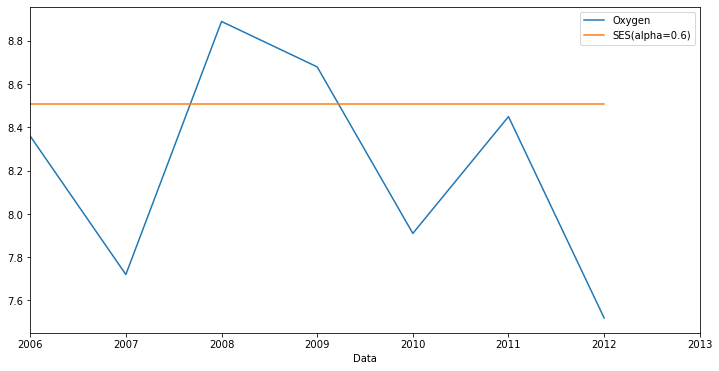

In [22]:
test.plot(figsize=(12,6), legend=True);
SES_results.shift(-1).plot(legend=True);

In [23]:
from pmdarima import auto_arima

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [25]:
sarimax_model = SARIMAX(train)

In [26]:
sarimax_fit = sarimax_model.fit()

In [27]:
sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Oxygen   No. Observations:                   40
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -50.747
Date:                Sat, 06 Feb 2021   AIC                            105.494
Time:                        12:04:32   BIC                            108.872
Sample:                    08-01-1966   HQIC                           106.715
                         - 08-01-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9955      0.015     65.514      0.000       0.966       1.025
sigma2         0.6583      0.134      4.909      0.000       0.395       0.921
===================================================================================
Ljung-Box (Q):                       37.76   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.53   Prob(JB):                         0.37
Heteroskedasticity (H):               3.26   Skew:                            -0.43
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
sarimax_results = sarimax_fit.predict(len(train), len(df)).shift(-1).rename('sarimax(1,0,0)')

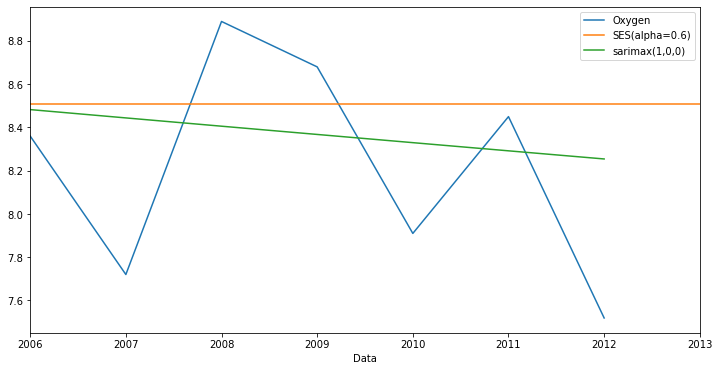

In [29]:
test.plot(figsize=(12,6), legend=True);
SES_results.plot(legend=True);
sarimax_results.plot(legend=True);